### Basic Setup

In [34]:
import polars as pl
from matplotlib import pyplot as plt
import numpy as np
from  sklearn.metrics import mean_absolute_percentage_error

In [35]:
datadir = "C:\\Users\\hdt.OJ\\OneDrive - OJ Electronics A S\\Thesis\\report\\data"

# modbus_log = f"{datadir}\\Test 2\\ModbusGUI-Log-2024-02-28T145324.csv"
# base_log = f"{datadir}\\Test 2\\BaseLog-2024-02-28T145348.csv"

# modbus_log = f"{datadir}\\Test 3\\ModbusGUI-Log-2024-02-29T120935.csv"
# base_log = f"{datadir}\\Test 3\\BaseLog-2024-02-29T121152.csv"

# modbus_log = f"{datadir}\\Test 4\\ModbusGUI-Log-2024-03-01T163054.csv"
# base_log = f"{datadir}\\Test 4\\BaseLog-2024-03-01T163114.csv"

# modbus_log = f"{datadir}\\Test 5\\ModbusGUI-Log-2024-03-01T173112.csv"
# base_log = f"{datadir}\\Test 5\\BaseLog-2024-03-01T173129.csv"

# modbus_log = f"{datadir}\\Test 6\\ModbusGUI-Log-2024-03-19T152042-ActiveCooling.csv"
# base_log = f"{datadir}\\Test 6\\BaseLog-2024-03-19T152053-ActiveCooling.csv"

# modbus_log = f"{datadir}\\Test 6\\BaseLog-2024-03-20T100744-Heating.csv"
# base_log = f"{datadir}\\Test 6\\ModbusGUI-Log-2024-03-20T100738-Heating.csv"

# modbus_log = f"{datadir}\\Test 6\\ModbusGUI-Log-2024-03-20T134038-NaturalCooling.csv"
# base_log = f"{datadir}\\Test 6\\BaseLog-2024-03-20T134102-NaturalCooling.csv"

### Start Data Processing

In [36]:
modbus_df = pl.read_csv(modbus_log)
base_df = pl.read_csv(base_log)

In [37]:
modbus_df = modbus_df.rename(mapping={'TimeStamp':'timestamp'})
modbus_df = modbus_df.drop("time_monotonic_seconds", "pwm_info_pulse_target")
modbus_df.head()

timestamp,regulation_setpoint,regulation_relay_state,pwm_info_pwm_period,pwm_info_pwm_step,pwm_info_pulse_counter,temperature_floor,temperature_ambient
str,f64,i64,i64,i64,i64,f64,f64
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.66
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.66
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.66
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.65
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.66


In [38]:
base_df = base_df[[
    "timestamp",
    "sec              ",
    "RefFloor-(CG0)   ",
    "RefRoom-(CG1)    ",
    "RefTopFloor-(CG3)",
    "AirInHouse-(CG4) "
]]

base_df.head()

timestamp,sec,RefFloor-(CG0),RefRoom-(CG1),RefTopFloor-(CG3),AirInHouse-(CG4)
str,i64,i64,i64,i64,i64
"""2024-03-01_17:…",43,211,189,198,119
"""2024-03-01_17:…",44,211,189,198,119
"""2024-03-01_17:…",45,211,189,198,119
"""2024-03-01_17:…",46,211,189,198,119
"""2024-03-01_17:…",47,211,189,198,119


In [39]:
df = modbus_df.join(base_df, on="timestamp", how="inner")
df.head()

timestamp,regulation_setpoint,regulation_relay_state,pwm_info_pwm_period,pwm_info_pwm_step,pwm_info_pulse_counter,temperature_floor,temperature_ambient,sec,RefFloor-(CG0),RefRoom-(CG1),RefTopFloor-(CG3),AirInHouse-(CG4)
str,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.65,43,211,189,198,119
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.65,44,211,189,198,119
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.65,45,211,189,198,119
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.65,46,211,189,198,119
"""2024-03-01_17:…",22.0,1,0,0,0,20.58,18.65,47,211,189,198,119


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


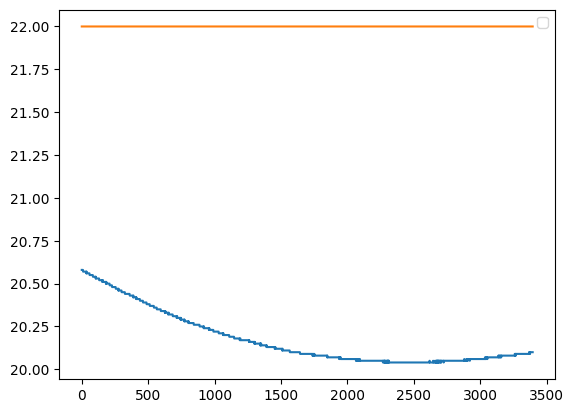

In [40]:
# df[f"regulation_setpoint"][0:-1] = 20

plt.figure(1)
plt.plot(df["temperature_floor"])
# df.replace("regulation_setpoint", pl.Series(np.full(df.height, 20.0)))
plt.plot(df["regulation_setpoint"])
# plt.plot(df["RefTopFloor-(CG3)"])
# plt.plot(df["RefFloor-(CG0)   "]/10)
# plt.plot(df["AirInHouse-(CG4) "]/10)
# plt.yticks(np.arange(0, 30, 0.5))
plt.legend()
plt.show()

In [41]:
def count_relay_switch(relay_states: pl.Series):
    state_difference = (relay_states[1:-1] - relay_states[0:-2]).abs()
    return state_difference.sum()

mape =  mean_absolute_percentage_error(df["regulation_setpoint"], df["temperature_floor"])
print("Mean absolute percentage error of this test is: ", mape)

Mean absolute percentage error of this test is:  0.08298366581871737


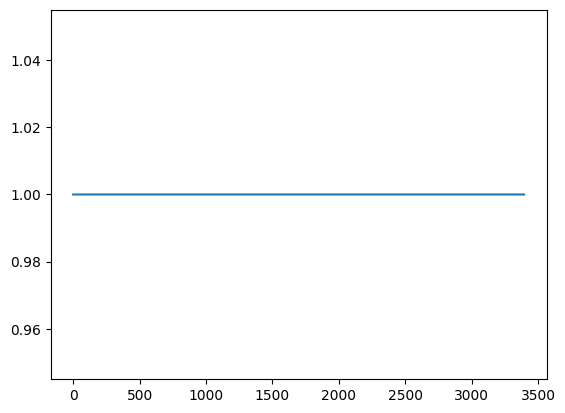

Total number of relay clicks is:  0


In [42]:
plt.figure(2)
plt.plot(df["regulation_relay_state"])
plt.show()
print("Total number of relay clicks is: ", count_relay_switch(df["regulation_relay_state"]))

The actual IO diagram is generated by the PI controller, hence not very well-fitted to be used for System Identification (SI) because SI requires a natural response under step input.

In [43]:
df.write_csv(f"{datadir}\\si_activeCooling.csv")

## Aggregate Heating and Cooling Phases

In [44]:
base_log_cool = f"{datadir}\\Test 6\\BaseLog-2024-03-19T152053-ActiveCooling.csv"
modbus_log_cool = f"{datadir}\\Test 6\\ModbusGUI-Log-2024-03-19T152042-ActiveCooling.csv"

base_log_heat = f"{datadir}\\Test 6\\BaseLog-2024-03-20T100744-Heating.csv"
modbus_log_heat = f"{datadir}\\Test 6\\ModbusGUI-Log-2024-03-20T100738-Heating.csv"

# base_log = f"{datadir}\\Test 6\\BaseLog-2024-03-20T134102-NaturalCooling.csv"
# modbus_log = f"{datadir}\\Test 6\\ModbusGUI-Log-2024-03-20T134038-NaturalCooling.csv"